# Cross-validation for parameter tuning, model selection, and feature selection


## Agenda

- What is the drawback of using the **train/test split** procedure for model evaluation?
- How does **K-fold cross-validation** overcome this limitation?
- How can cross-validation be used for selecting **tuning parameters**, choosing between **models**, and selecting **features**?
- What are some possible **improvements** to cross-validation?

## Review of model evaluation procedures

**Motivation:** Need a way to choose between machine learning models

- Goal is to estimate likely performance of a model on **out-of-sample data**

**Initial idea:** Train and test on the same data

- But, maximizing **training accuracy** rewards overly complex models which **overfit** the training data
- It is never a good idea to train and test on the same data.  To see how a model generalizes, you have to hold out some of the data for testing.  This hold out data is **not** used for training.
- This is the concept behind *train-test-split*

**Better idea:** Train/test split

- Split the dataset into two pieces, so that the model can be trained and tested on **different data**
- **Testing accuracy** is a better estimate than training accuracy of out-of-sample performance
- But, it provides a **high variance** estimate since changing which observations happen to be in the testing set can significantly change testing accuracy
- The reason for **high variance** is that *train-test-split* takes one random sample of the data to perfom the split
  - The next time you run *train-test-split* you will get a new data set and a new accuracy
  - To get a better idea of how a model performs, you would want to take many samples to train and test on.

**K-Fold Cross Validation**

K-Fold Cross Validation will split a dataset up into a number of different training sets and testing sets to provide you with a better idea of how the model will generalize to unseen data.  

This notebook looks at a number of different Cross Validation techniques to better measure the performance of different models.

- Split the data into multiple pieces so that the model can be trained on many different views of the data
- Each Fold will have an accuracy score and the overall accuracy of the model is commonly measured as the mean of each Fold accuracy.
- Cross validation accounts for the **high variance** and provides a much better representation of performance


In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import KFold

from sklearn import metrics
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

## Problem With train-test-split

Lets look at why *train_test_split* is not a good way to measure overall model performance. 

Below we will use the Iris dataset and use train_test_split a couple of different times

In [3]:
# read in the iris data
iris = load_iris()

# create X (features) and y (response)
X = iris.data
y = iris.target

Try changing the random_state below and see how the accuracy changes based on the train/test split of data.

We would like to account for this variance and show an accuracy representative of all of the data.

In [19]:
# use train/test split letting *train_test_split* randomly select the dataset to use.
X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y)
X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y)
X_train3, X_test3, y_train3, y_test3 = train_test_split(X, y)



# check classification accuracy of KNN with K=5
knn = KNeighborsClassifier(n_neighbors=5)

# Use TrainTest Split 1
knn.fit(X_train1, y_train1)
y_pred = knn.predict(X_test1)
accuracy1 = metrics.accuracy_score(y_test1, y_pred)

# Use TrainTest Split 2
knn.fit(X_train2, y_train2)
y_pred = knn.predict(X_test2)
accuracy2 = metrics.accuracy_score(y_test2, y_pred)

# Use TrainTest Split 3
knn.fit(X_train3, y_train3)
y_pred = knn.predict(X_test3)
accuracy3 = metrics.accuracy_score(y_test3, y_pred)


print(f"Split 1: {accuracy1}, Split 2: {accuracy2}, Split 3: {accuracy3}, Average: {(accuracy1+accuracy2+accuracy3)/3}")


Split 1: 0.9736842105263158, Split 2: 0.9473684210526315, Split 3: 0.9736842105263158, Average: 0.9649122807017544


Notice above if you keep running the cell, the accuracy for each split changes and the overall average accuracy changes.

**Question:** What if we created a bunch of train/test splits, calculated the testing accuracy for each, and averaged the results together?

**Answer:** That's the essense of cross-validation!

## Steps for K-fold cross-validation

1. Split the dataset into K **equal** partitions (or "folds").
2. Use fold 1 as the **testing set** and the union of the other folds as the **training set**.
3. Calculate **testing accuracy**.
4. Repeat steps 2 and 3 K times, using a **different fold** as the testing set each time.
5. Use the **average testing accuracy** as the estimate of out-of-sample accuracy.

## 5-Fold cross validation

### Cross-validation for more robust estimates


![cross-validation](images/cross_validation.svg)

- Dataset contains **25 observations** (numbered 0 through 24)
- 5-fold cross-validation, thus it runs for **5 iterations**
- For each iteration, every observation is either in the training set or the testing set, **but not both**
- Every observation is in the testing set **exactly once**

## Comparing cross-validation to train/test split

Advantages of **cross-validation:**

- More accurate estimate of out-of-sample accuracy
- More "efficient" use of data (every observation is used for both training and testing)
- Provides a better measure of how the model behaves across all of the known training data

Advantages of **train/test split:**

- Runs K times faster than K-fold cross-validation
- Simpler to examine the detailed results of the testing process

## Custom cross-validation iterators

In [4]:
from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit, StratifiedShuffleSplit

In [5]:
from ml_util import print_test_fold, plot_cv

In [6]:
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### KFold

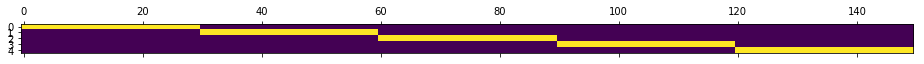

In [7]:
# Split dataset into k consecutive folds (without shuffling by default).
cv = KFold(n_splits=5)
plot_cv(cv, X, y)

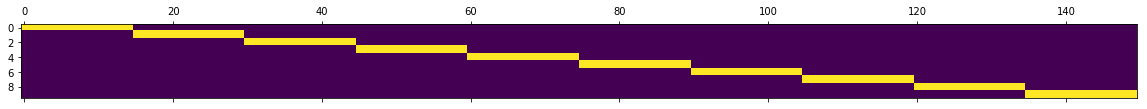

In [10]:
# shuffle the data BEFORE splitting into batches
cv = KFold(n_splits=10)
plot_cv(cv, X, y)

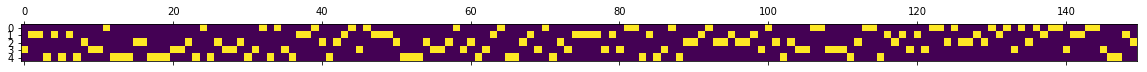

In [11]:
cv = KFold(n_splits=5, shuffle=True)
plot_cv(cv, X, y)

### Stratified KFold

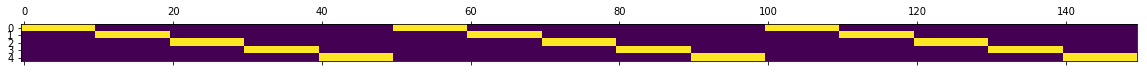

In [8]:
# This cross-validation object is a variation of KFold that returns stratified folds. 
# The folds are made by preserving the percentage of samples for each class.

cv = StratifiedKFold(n_splits=5)
plot_cv(cv, X,y)

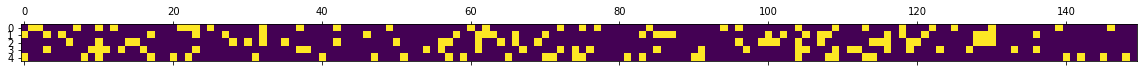

In [12]:
# Random permutation cross-validator
# Note: contrary to other cross-validation strategies, random splits do not guarantee 
#that all folds will be different, although this is still very likely for sizeable datasets.

cv = ShuffleSplit(n_splits=5, test_size=.2)
plot_cv(cv, X, y)

### ShuffleSplit

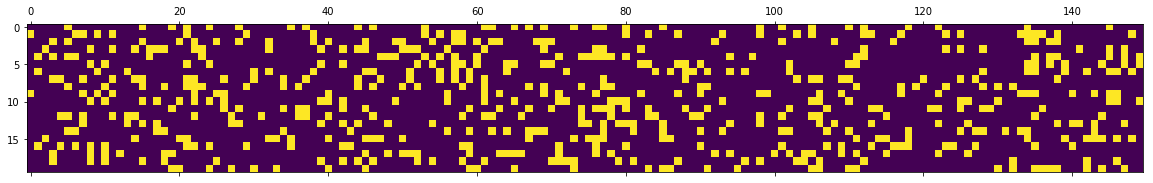

In [13]:
cv = ShuffleSplit(n_splits=20, test_size=.2)
plot_cv(cv, X, y)

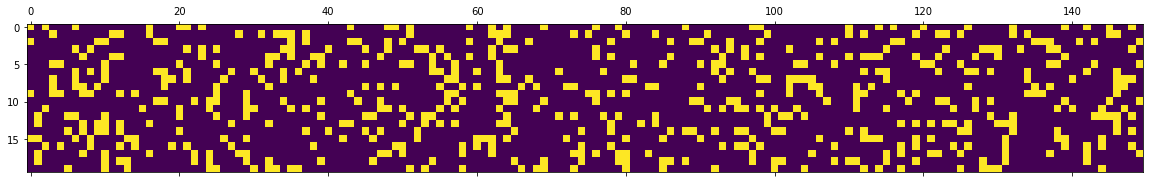

In [14]:
# This cross-validation object is a merge of StratifiedKFold and ShuffleSplit, 
# which returns stratified randomized folds. The folds are made by preserving the 
# percentage of samples for each class.

cv = StratifiedShuffleSplit(n_splits=20, test_size=.2)
plot_cv(cv, X, y)

## Cross-validation recommendations

1. K can be any number, but **K=10** is generally recommended
    - remember, this 'K' is the number of folds, NOT the number of neighbors for KNN.
2. For classification problems, **stratified sampling** is recommended for creating the folds
    - Each response class should be represented with equal proportions in each of the K folds
    - scikit-learn's `cross_val_score` function does this by default

## Cross-validation example: parameter tuning

**Goal:** Select the best tuning parameters (aka "hyperparameters") for KNN on the iris dataset

In [92]:
from sklearn.model_selection import cross_val_score

In [93]:
# 10-fold cross-validation with K=5 for KNN (the n_neighbors parameter)
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
print(scores)

[ 1.          0.93333333  1.          1.          0.86666667  0.93333333
  0.93333333  1.          1.          1.        ]


In [94]:
# use average accuracy as an estimate of out-of-sample accuracy
print(scores.mean())

0.966666666667


In [95]:
# search for an optimal value of K for KNN
k_range = list(range(1, 31))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())
print(k_scores)

[0.95999999999999996, 0.95333333333333337, 0.96666666666666656, 0.96666666666666656, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.96666666666666679, 0.96666666666666679, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.97333333333333338, 0.98000000000000009, 0.97333333333333338, 0.98000000000000009, 0.96666666666666656, 0.96666666666666656, 0.97333333333333338, 0.95999999999999996, 0.96666666666666656, 0.95999999999999996, 0.96666666666666656, 0.95333333333333337, 0.95333333333333337, 0.95333333333333337]


Text(0,0.5,'Cross-Validated Accuracy')

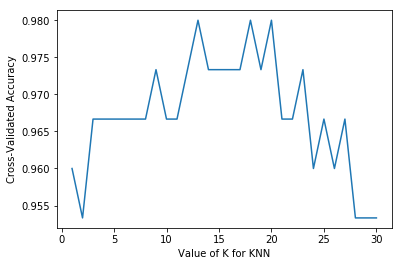

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

# plot the value of K for KNN (x-axis) versus the cross-validated accuracy (y-axis)
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

In [97]:
# 10-fold cross-validation with the best KNN model
knn = KNeighborsClassifier(n_neighbors=20)
print(cross_val_score(knn, X, y, cv=10, scoring='accuracy').mean())

0.98


In [98]:
# 10-fold cross-validation with logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
print(cross_val_score(logreg, X, y, cv=10, scoring='accuracy').mean())

0.953333333333


## REMOVE ME - it is in 07_ Cross-validation example: feature selection

**Goal**: Select whether the Newspaper feature should be included in the linear regression model on the advertising dataset

In [99]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [100]:
# read in the advertising dataset
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [101]:
data.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [102]:
# create a Python list of three feature names
feature_cols = ['TV', 'radio', 'newspaper']

# use the list to select a subset of the DataFrame (X)
X = data[feature_cols]

# select the Sales column as the response (y)
y = data.sales

In [103]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [104]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [105]:
# convert from MSE to RMSE
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 1.88689808  1.81595022  1.44548731  1.68069713  1.14139187  1.31971064
  2.85891276  1.45399362  1.7443426   1.56614748]


In [106]:
# calculate the average RMSE
print(rmse_scores.mean())

1.69135317081


In [107]:
# 10-fold cross-validation with two features (excluding Newspaper)
feature_cols = ['TV', 'radio']
X = data[feature_cols]
print(np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191


### Conclusion

Since the error without Newspaper is lower, we can then say that we should drop the Newspaper feature column from the data set when creating the model.

## Improvements to cross-validation

**Repeated cross-validation**

- Repeat cross-validation multiple times (with **different random splits** of the data) and average the results
- More reliable estimate of out-of-sample performance by **reducing the variance** associated with a single trial of cross-validation

**Creating a hold-out set**

- "Hold out" a portion of the data **before** beginning the model building process
- Locate the best model using cross-validation on the remaining data, and test it **using the hold-out set**
- More reliable estimate of out-of-sample performance since hold-out set is **truly out-of-sample**

**Feature engineering and selection within cross-validation iterations**

- Normally, feature engineering and selection occurs **before** cross-validation
- Instead, perform all feature engineering and selection **within each cross-validation iteration**
- More reliable estimate of out-of-sample performance since it **better mimics** the application of the model to out-of-sample data

## Resources

- scikit-learn documentation: [Cross-validation](http://scikit-learn.org/stable/modules/cross_validation.html), [Model evaluation](http://scikit-learn.org/stable/modules/model_evaluation.html)
- scikit-learn issue on GitHub: [MSE is negative when returned by cross_val_score](https://github.com/scikit-learn/scikit-learn/issues/2439)
- Section 5.1 of [An Introduction to Statistical Learning](http://www-bcf.usc.edu/~gareth/ISL/) (11 pages) and related videos: [K-fold and leave-one-out cross-validation](https://www.youtube.com/watch?v=nZAM5OXrktY) (14 minutes), [Cross-validation the right and wrong ways](https://www.youtube.com/watch?v=S06JpVoNaA0) (10 minutes)
- Scott Fortmann-Roe: [Accurately Measuring Model Prediction Error](http://scott.fortmann-roe.com/docs/MeasuringError.html)
- Machine Learning Mastery: [An Introduction to Feature Selection](http://machinelearningmastery.com/an-introduction-to-feature-selection/)
- Harvard CS109: [Cross-Validation: The Right and Wrong Way](https://github.com/cs109/content/blob/master/lec_10_cross_val.ipynb)
- Journal of Cheminformatics: [Cross-validation pitfalls when selecting and assessing regression and classification models](http://www.jcheminf.com/content/pdf/1758-2946-6-10.pdf)